In [2]:
import pandas as pd 

names = ["edible","cap-shape","cap-surface", "cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stock-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","viel-type","viel-color","ring number","ring-type","spore-print-color","population","habitat"]
dataset = pd.read_csv('mush.csv',names = names)


from ctypes import PyDLL
import pandas as pd #need pandas to store data and dataframe 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder #to convert strings to numbers
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC #support vector classifier
from sklearn.metrics import classification_report #evaluation matrix 

enc = OrdinalEncoder()
X = dataset.drop('edible', axis=1) #corresponding attributes 
y = dataset['edible'] #corresponding label (trying to predict)
#print(x.head)
#print(y.head)
y = y.values.reshape(-1,1)

encodedx = enc.fit_transform(X)
#print(encodedx)
encodedy = enc.fit_transform(y)
#print(encodedy[0:15])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encodedx, encodedy, test_size=0.20,random_state=20)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, encodedx, encodedy.ravel(), cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69618696 0.99876999 1.         0.99876999 0.99630542 1.
 1.         1.         0.7955665  1.        ]
cv_scores mean:0.9485598858451638


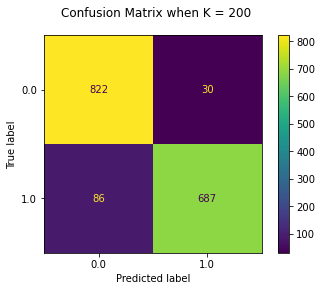

--- 0.6424384117126465 seconds ---
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       852
         1.0       0.96      0.89      0.92       773

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625

 
Confusion Matrix:


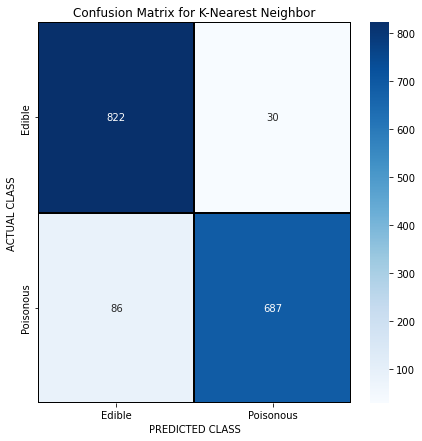

NameError: name 'model' is not defined

In [7]:
from sklearn.metrics import confusion_matrix
import time
start_time = time.time()
import seaborn as sns
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(X_train, y_train.ravel())


y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

     
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(knn, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix when K = 200")
plt.show()
from sklearn.metrics import classification_report
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)
print(" ")
#print("Confusion Matrix (criterion='gini', max_depth=15, min_samples_split=8, splitter='random'):")
print("Confusion Matrix:")
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED CLASS")
plt.ylabel("ACTUAL CLASS")
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.savefig("dtcm2.png", format='png', dpi=500, bbox_inches='tight')
plt.show()
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=("Edible","Posionous"))
fig.figure_.suptitle("Confusion Matrix for Mushroom Dataset")
plt.show()

In [40]:

from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

for i in range(5):
    
    #use gridsearch to test all values for n_neighbors
    knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
    cv_scores = cross_val_score(knn_cv, encodedx, encodedy.ravel(), cv=10)

    #fit model to data
    knn_gscv.fit(encodedx, encodedy.ravel())


    #check top performing n_neighbors value
    print(knn_gscv.best_params_)

    #check mean score for the top performing value of n_neighbors
    print(knn_gscv.best_score_)

    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    times = [0]
    print("--- %s seconds ---" % (time.time() - start_time-))
    times.append(time.time() - start_time)

print(times)
print(sum(times)/5)

SyntaxError: invalid syntax (Temp/ipykernel_29200/195801803.py, line 28)

In [35]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    

Text(0, 0.5, 'Mean Error')

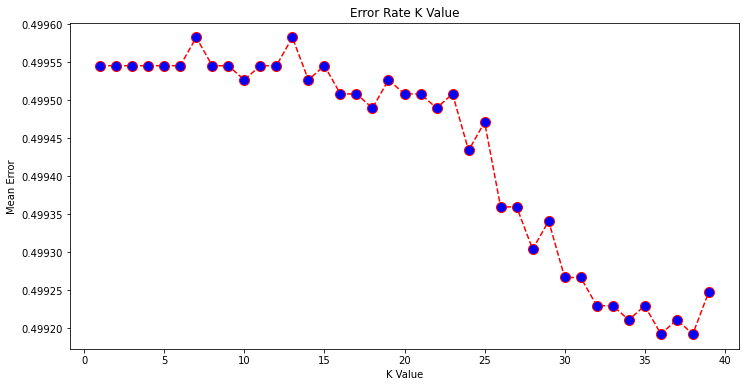

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Testing Accuracy')

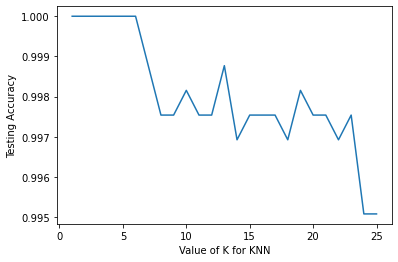

In [10]:
#Accuracy Rate Overtime as K values changes

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [48]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1)
import time
start_time = time.time()

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, encodedx, encodedy.ravel(), cv=10)
#print each cv score (accuracy) and average them
print("--- %s seconds ---" % (time.time() - start_time))
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

--- 0.9735283851623535 seconds ---
[0.69372694 1.         1.         1.         0.99753695 1.
 1.         1.         0.88793103 1.        ]
cv_scores mean:0.9579194917564939


In [ ]:
0.9579194917564939
0.9579194917564939
0.9579194917564939
0.9579194917564939
0.9579194917564939